$$\frac{dy}{dx} = 0$$

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from edo import EDOModel


model = EDOModel(activations='sigmoid',denses=10)
full_size=10
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3))
x = tf.cast(tf.linspace(0,1,full_size)[:,tf.newaxis],dtype=tf.float64)
y = tf.exp(-x/5)*tf.sin(x)
model.fit(x,y,epochs=5000)

2025-01-28 10:41:01.059593: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2025-01-28 10:41:01.061704: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-28 10:41:01.070378: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2025-01-28 10:41:01.291115: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2025-01-28 10:41:01.303164: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2099940000 Hz


Epoch 1/5000
1/1 [==============================] - 1s 568ms/step - loss: 6.7958
Epoch 2/5000
1/1 [==============================] - 0s 1ms/step - loss: 6.6881
Epoch 3/5000
1/1 [==============================] - 0s 1ms/step - loss: 6.5813
Epoch 4/5000
1/1 [==============================] - 0s 2ms/step - loss: 6.4754
Epoch 5/5000
1/1 [==============================] - 0s 2ms/step - loss: 6.3706
Epoch 6/5000
1/1 [==============================] - 0s 2ms/step - loss: 6.2668
Epoch 7/5000
1/1 [==============================] - 0s 2ms/step - loss: 6.1639
Epoch 8/5000
1/1 [==============================] - 0s 2ms/step - loss: 6.0621
Epoch 9/5000
1/1 [==============================] - 0s 1ms/step - loss: 5.9613
Epoch 10/5000
1/1 [==============================] - 0s 1ms/step - loss: 5.8615
Epoch 11/5000
1/1 [==============================] - 0s 3ms/step - loss: 5.7628
Epoch 12/5000
1/1 [==============================] - 0s 4ms/step - loss: 5.6651
Epoch 13/5000
1/1 [============================

In [2]:
x

<tf.Tensor: shape=(10, 1), dtype=float64, numpy=
array([[0.        ],
       [0.11111111],
       [0.22222222],
       [0.33333333],
       [0.44444444],
       [0.55555556],
       [0.66666667],
       [0.77777778],
       [0.88888889],
       [1.        ]])>

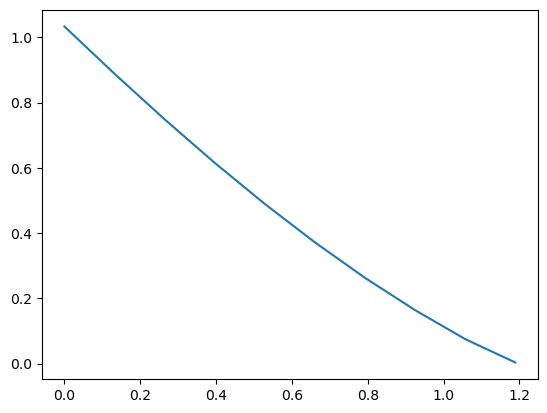

In [3]:
plt.plot(np.linspace(np.min(y),np.max(y)+.5,full_size),tf.math.abs(model.predict(x)-y))

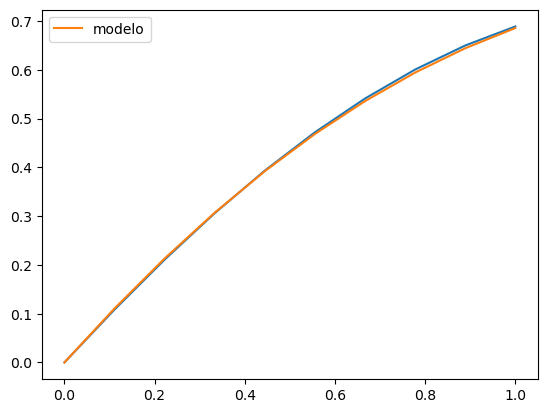

In [17]:
plt.plot(x,tf.exp(-x/5)*tf.sin(x))
plt.plot(x,x*model.predict(x),label='modelo')
plt.legend()

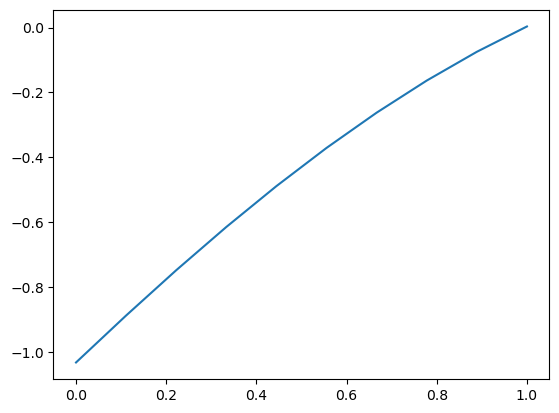

In [8]:
plt.plot(x,y-model(x))